In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display





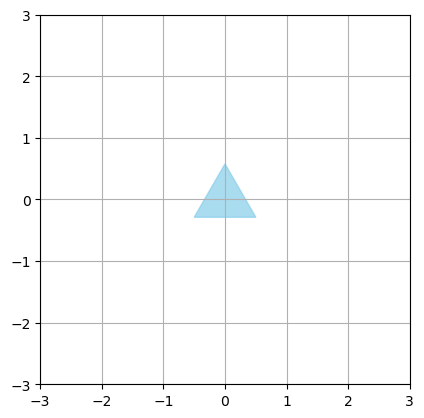

In [2]:


# Step 1: Create equilateral triangle of side length 1
h = np.sqrt(3)/2
triangle = np.array([
    [0.0,   -0.5,  0.5],
    [h,     0.0,   0.0],
    [1.0,   1.0,   1.0]
])

# Step 2: Center it around its centroid
cx = np.mean(triangle[0])
cy = np.mean(triangle[1])

triangle[0] -= cx
triangle[1] -= cy


# Function to draw the shape
def draw_shape(shape, ax, color='skyblue'):
    ax.fill(shape[0], shape[1], color=color, alpha=0.7)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_aspect('equal')
    ax.grid(True)

# Plot it
fig, ax = plt.subplots()
draw_shape(triangle, ax)
plt.show()


In [3]:


# Translation matrix
def translate(dx, dy):
    return np.array([
        [1, 0, dx],
        [0, 1, dy],
        [0, 0, 1]
    ])

# Rotation matrix (angle in radians)
def rotate(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])

# Scaling matrix
def scale(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])


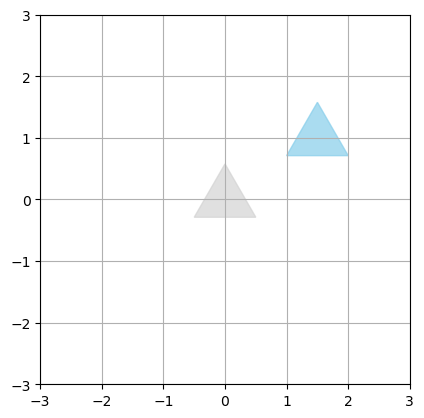

In [4]:
# Original triangle

# Transformations
T = translate(1.5, 1)
R = rotate(2*np.pi )
S = scale(1, 1)

# Combine them
transform = T @ S @ R
transformed_triangle = transform @ triangle

# Plot both
fig, ax = plt.subplots()
draw_shape(triangle, ax, color='lightgray')  # original
draw_shape(transformed_triangle, ax, color='skyblue')  # transformed
plt.show()



In [29]:
fig, ax = plt.subplots() 
def update(frame):
    ax.clear()
    
    t = frame / 20  # Time-like variable

    # Time-based transformations
    T = translate(2*np.sin(t) , 2*np.cos(t))  # Circular motion
    R = rotate(3*t)                              # Rotating
    S = scale(0.5 + (np.cos(t)+1)/2, 0.5 + (np.cos(t)+1)/2)  # Pulsing
    # Combine transformations
    transform = T @S@ R 

    # Apply to triangle
    transformed = transform @ triangle

    # Draw
    draw_shape(transformed, ax)
  
  

ani = FuncAnimation(fig, update, frames=120, interval=50)
plt.close() 
display(HTML(ani.to_jshtml()))
ani.save("animated_triangle.gif", writer='pillow', fps=10)

